In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('hearing_test.csv')
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [31]:
# Description about the dataset

df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [32]:
# TO see how many people who passed the test.
# We can either use value_count function or seaborn countplot

df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

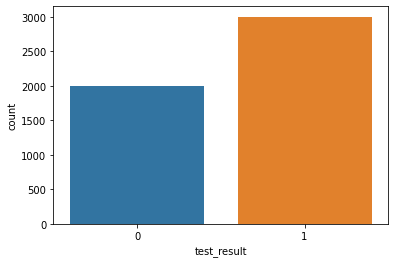

In [33]:
sns.countplot(data=df, x='test_result')

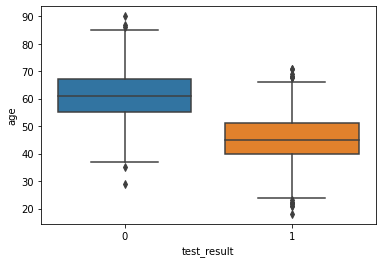

In [34]:
# boxplot to show the ralationship between one feature column and test result at a time.
# As the age increases the probability of passing the test decreases.

sns.boxplot(data=df, x='test_result', y='age')

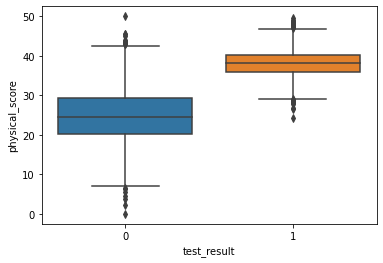

In [35]:
# As the physical score decreases the probability of passing the test decreases.

sns.boxplot(data=df, x='test_result', y='physical_score')

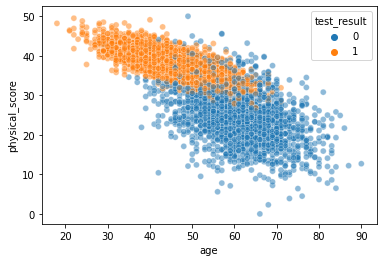

In [36]:
#scatterplot
# We can clearly see that young people tends to have good physical score
# As the age increases the physical score decreases.
# As the age increases and physical score decreases probability of passing the test diminishes.

#plt.figure(dpi=150)
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result',alpha=0.5)

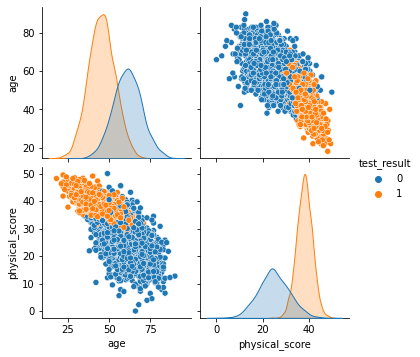

In [37]:
#pairplot

sns.pairplot(data=df, hue='test_result')

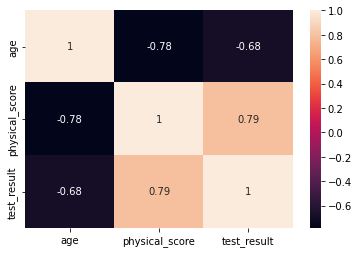

In [38]:
# We can even plot the heatmap to show how corelated each features are
# Physical score and test result are positively corelated.
# As physical score increases probability of passing test_result is high.
# Age and test result are negatively corelated.
# As the age increases the probability of passing the test decreases. 

sns.heatmap(data=df.corr(), annot=True)

In [39]:
# Now we have to split the data into features (X) and target variable (y)

X = df.drop('test_result', axis=1)

In [40]:
y = df['test_result']

In [41]:
# Now we need to split the variables into training and testing datasets

from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [43]:
X_train.shape

(3500, 2)

In [44]:
y_train.shape

(3500,)

In [45]:
X_test.shape

(1500, 2)

In [46]:
y_test.shape

(1500,)

In [47]:
# now we need to preprocess the X_train and X_test varibales.

from sklearn.preprocessing import StandardScaler

In [48]:
scalar = StandardScaler()

In [49]:
# we will do a fit_transform on X_train dataset.
# But we will do only transform on the X_test dataset.

transform_X_train = scalar.fit_transform(X_train)

In [50]:
transform_X_test = scalar.transform(X_test)

In [51]:
# Now time to create model and train it with training data

from sklearn.linear_model import LogisticRegression

In [52]:
model = LogisticRegression()

In [53]:
model.fit(transform_X_train, y_train)

LogisticRegression()

In [54]:
y_pred = model.predict(transform_X_test)

In [56]:
# Coefficeint of the model

model.coef_

array([[-0.91653034,  3.4506941 ]])

<h2> from the coefficient value it is clear that age has inverse effect of test getting passed which means as age increases the probability of test getting cleared decreases. However as the physical score increases the probability of test getting cleared increases.</h2>

In [58]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [62]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, confusion_matrix

In [60]:
accuracy_score(y_test, y_pred)

0.9206666666666666

In [63]:
confusion_matrix(y_test, y_pred)

array([[515,  82],
       [ 37, 866]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


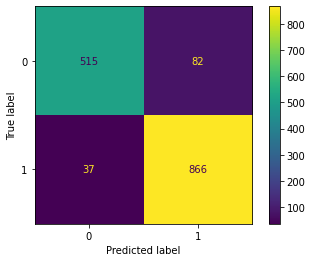

In [64]:
plot_confusion_matrix(model, transform_X_test, y_test)

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       597
           1       0.91      0.96      0.94       903

    accuracy                           0.92      1500
   macro avg       0.92      0.91      0.92      1500
weighted avg       0.92      0.92      0.92      1500



In [67]:
from sklearn.metrics import recall_score, precision_score

In [68]:
recall_score(y_test, y_pred)

0.9590254706533776

In [69]:
precision_score(y_test, y_pred)

0.9135021097046413

In [70]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


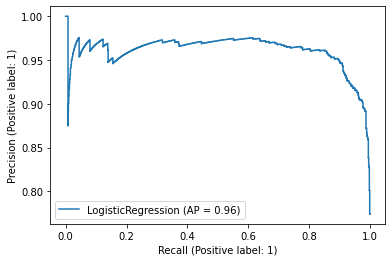

In [71]:
plot_precision_recall_curve(model, transform_X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


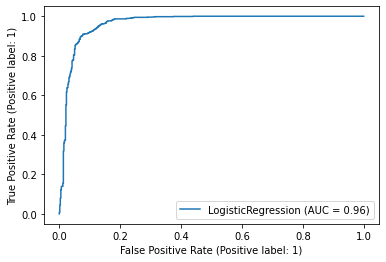

In [72]:
plot_roc_curve(model, transform_X_test, y_test)